In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *

/export/home/srasp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
REFDIR = '/scratch/srasp/Aquaplanet_enhance05/'
FBPDIR = '/scratch/srasp/fluxbypass_aqua/'

In [7]:
reffns = sorted(glob(f'{REFDIR}AndKua*'))
fbpfns = sorted(glob(f'{FBPDIR}AndKua*'))
len(reffns), len(fbpfns)

(733, 192)

In [12]:
%%time
dref = xr.open_mfdataset(reffns[0:180:10], decode_times=False, decode_cf=False)
dfbp = xr.open_mfdataset(fbpfns[0:180:10], decode_times=False, decode_cf=False)

CPU times: user 5.13 s, sys: 249 ms, total: 5.38 s
Wall time: 17.1 s


In [15]:
def comp(func, **kwargs):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    [func(d).plot(ax=ax, **kwargs) for d, ax in zip([dref, dfbp], axes.flat)]

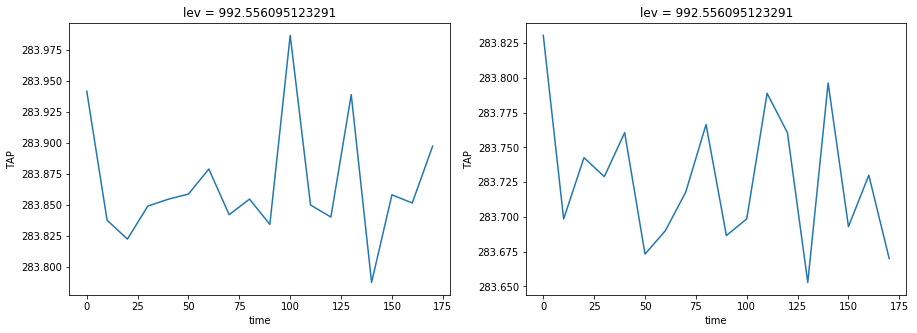

In [17]:
comp(lambda d: d['TAP'].isel(time=slice(0, None, 48), lev=-1).mean(('lat', 'lon')))

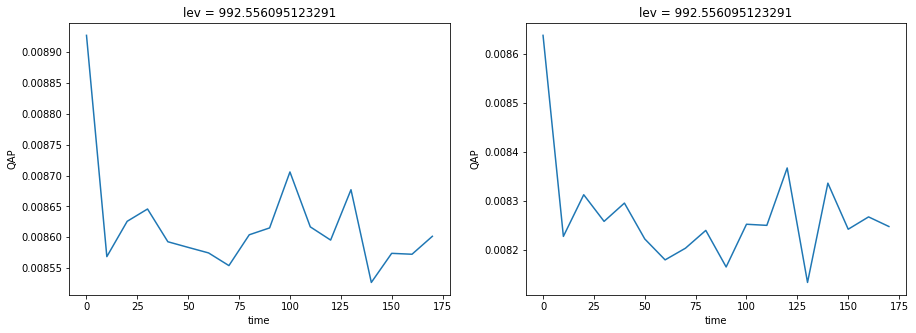

In [18]:
comp(lambda d: d['QAP'].isel(time=slice(0, None, 48), lev=-1).mean(('lat', 'lon')))

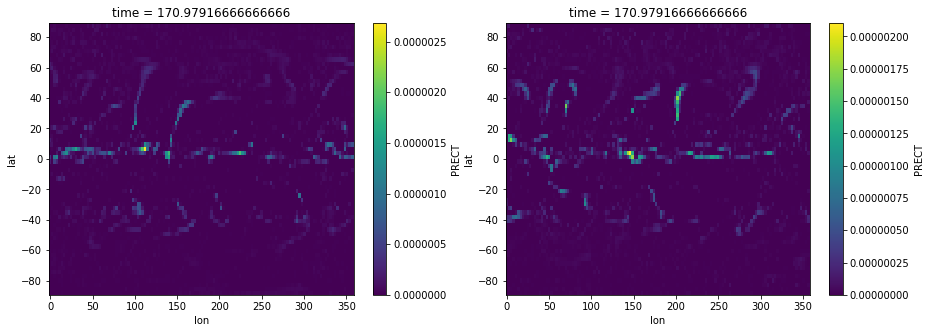

In [16]:
comp(lambda d: d['PRECT'].isel(time=-1))

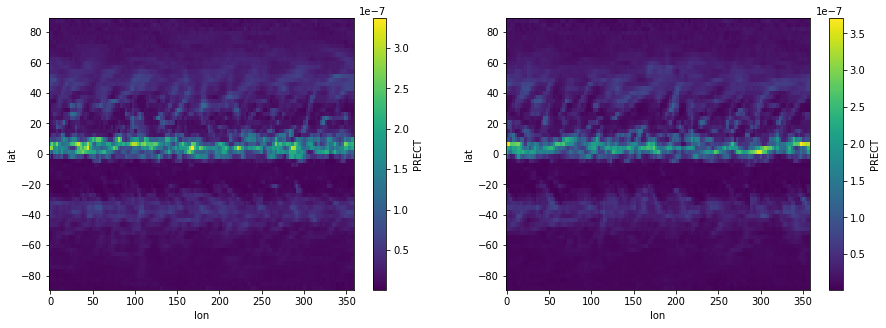

In [20]:
comp(lambda d: d['PRECT'].mean('time'))

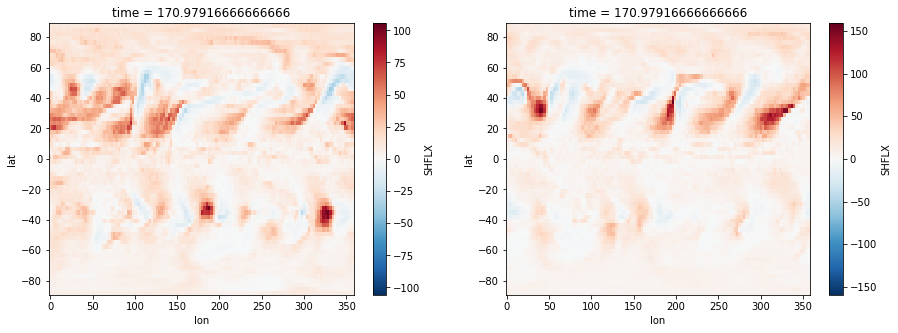

In [21]:
comp(lambda d: d['SHFLX'].isel(time=-1))

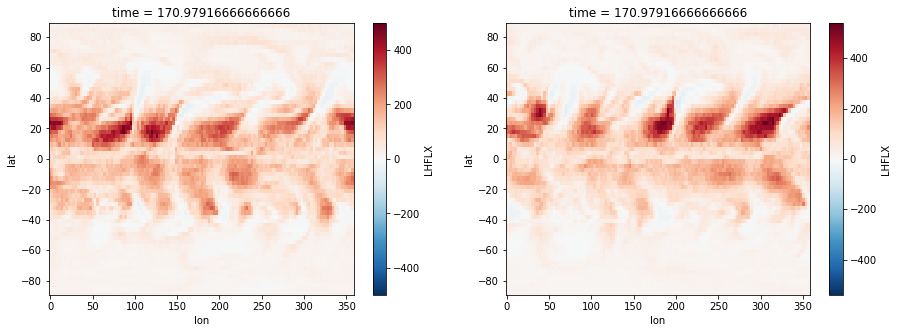

In [22]:
comp(lambda d: d['LHFLX'].isel(time=-1))

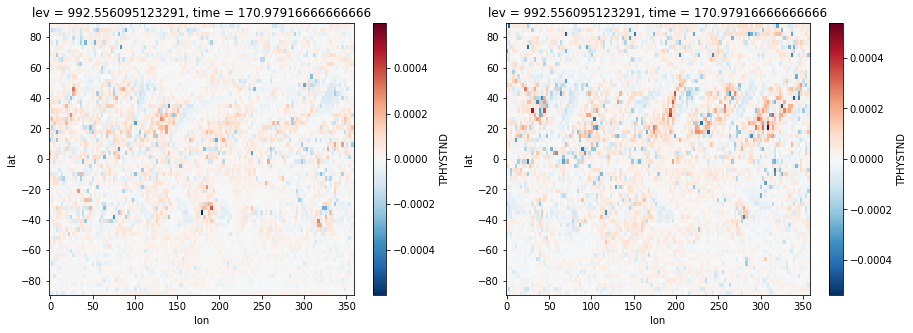

In [23]:
comp(lambda d: d['TPHYSTND'].isel(time=-1, lev=-1))

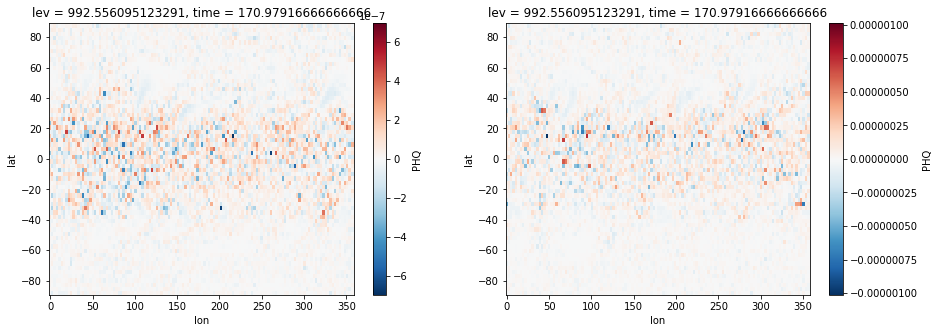

In [24]:
comp(lambda d: d['PHQ'].isel(time=-1, lev=-1))

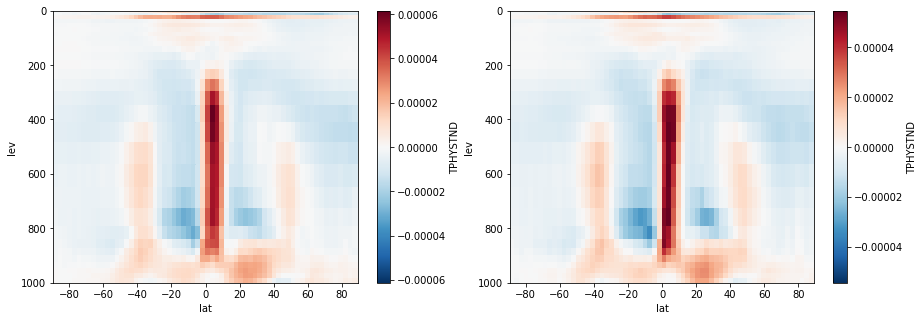

In [26]:
comp(lambda d: d['TPHYSTND'].isel(time=slice(0, None, 10)).mean(('lon', 'time')), yincrease=False)

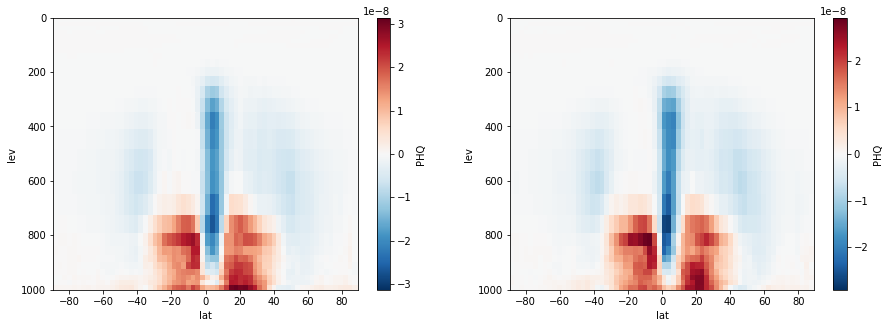

In [27]:
comp(lambda d: d['PHQ'].isel(time=slice(0, None, 10)).mean(('lon', 'time')), yincrease=False)

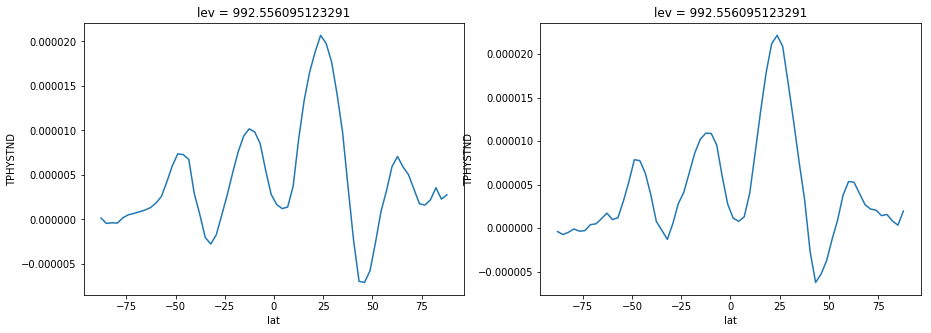

In [29]:
comp(lambda d: d['TPHYSTND'].isel(lev=-1).mean(('lon', 'time')))

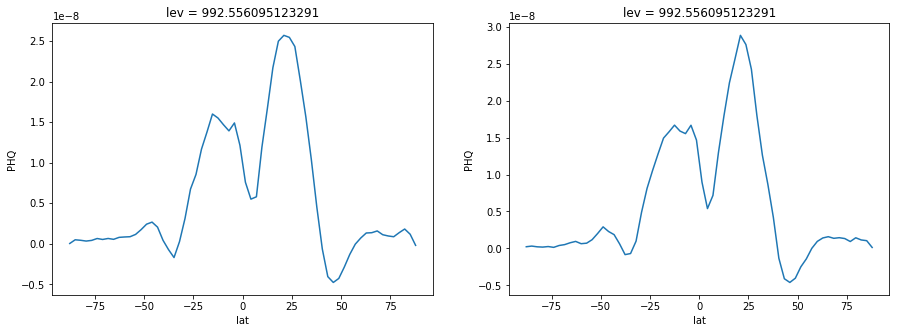

In [28]:
comp(lambda d: d['PHQ'].isel(lev=-1).mean(('lon', 'time')))

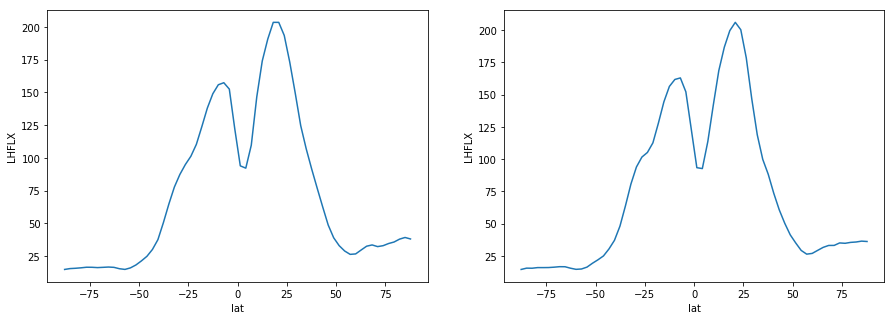

In [31]:
comp(lambda d: d['LHFLX'].mean(('lon', 'time')))

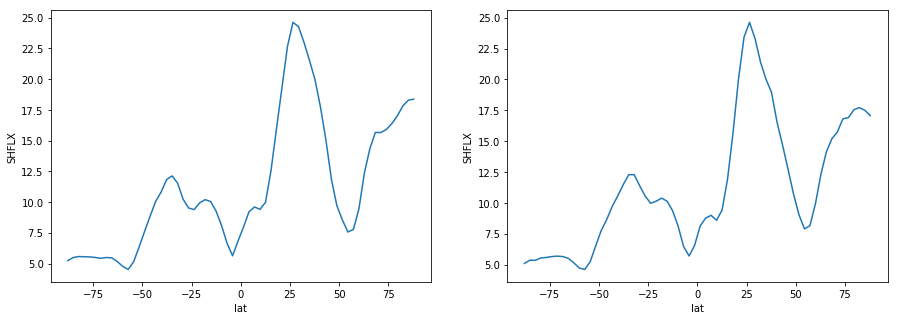

In [32]:
comp(lambda d: d['SHFLX'].mean(('lon', 'time')))

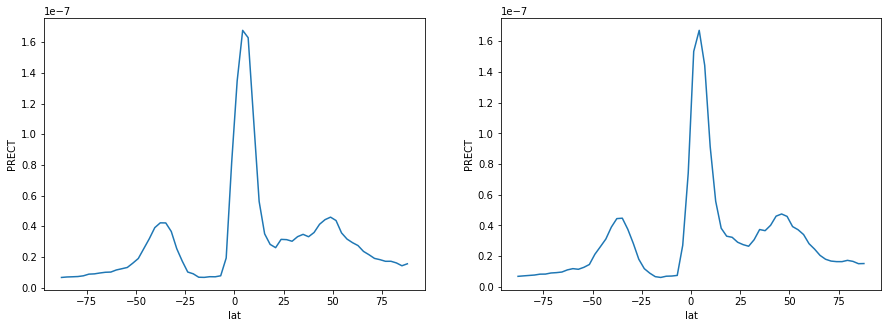

In [33]:
comp(lambda d: d['PRECT'].mean(('lon', 'time')))

In [45]:
a = vint(dfbp, 'PHQ', L_V).isel(time=2).values
b = vint(dfbp, 'SPDQ', L_V).isel(time=2).values + dfbp['LHFLX'].isel(time=1).values 

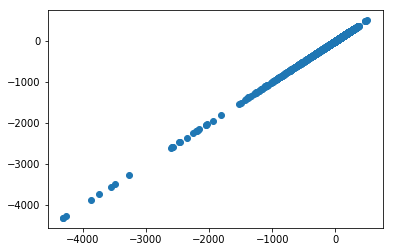

In [46]:
plt.scatter(a.flat, b.flat);

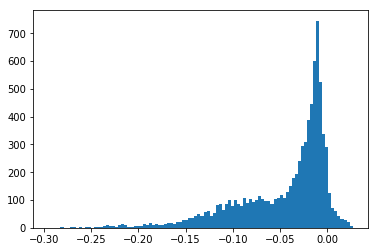

In [47]:
plt.hist((a - b).flat, bins=100);

In [36]:
dfbp['TPHYSTND_NORAD'] = dfbp['TPHYSTND'] - dfbp['QRL'] - dfbp['QRS']

In [42]:
a = vint(dfbp, 'TPHYSTND_NORAD', C_P).isel(time=2).values
b = vint(dfbp, 'SPDT', C_P).isel(time=2).values + dfbp['SHFLX'].isel(time=1).values 

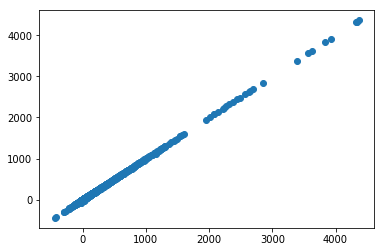

In [43]:
plt.scatter(a.flat, b.flat);

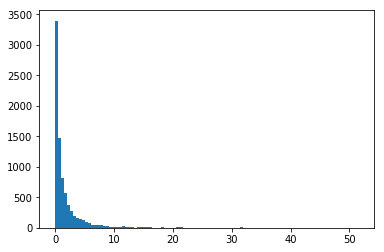

In [44]:
plt.hist((a - b).flat, bins=100);